In [1]:
import os
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
!pip install textract
!apt-get install -y antiword
import textract
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 37.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  antiword
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 118 kB of archives.
After this operation, 603 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 antiword amd64 0.37-16 [118 kB]
Fetched 118 kB in 1s (229 kB/s)
Selecting previously unselected package antiword.
(Reading database ... 120493 files and directories currently installed.)
Preparing to unpack .../antiword_0.37-16_amd64.deb ...
Unpacking antiword (0.37-16) ...
Setting up antiword (0.37-16) ...
Processing triggers for man-db (2.10.2-1) ...


In [2]:
#NATURAL LANGUAGE PROCESSING PACKAGES
import string # special operations on strings
import spacy # language models
import nltk #natural language tool kit
nltk.download('stopwords')

from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
main_folder_path = '/content/drive/MyDrive/Resumes'


In [5]:
# Specify the subfolder names
subfolder_names = ['SQL Developer Lightning insight', 'Peoplesoft resumes', 'workday resumes']

In [6]:
# Join resumes from different folders into a single DataFrame
resume_data = pd.DataFrame(columns=['CV', 'Skills'])


In [7]:
# Function to extract text from resume using resume-parser
def extract_text(file_path):
    text = textract.process(file_path)
    return text.decode('utf-8') if text else ""

# Iterate through the subfolders
for subfolder_name in subfolder_names:
    subfolder_path = os.path.join(main_folder_path, subfolder_name)
    if os.path.exists(subfolder_path):
        files = os.listdir(subfolder_path)
        for file_name in files:
            file_path = os.path.join(subfolder_path, file_name)
            if file_name.endswith('.pdf') or file_name.endswith('.docx') or file_name.endswith('.doc'):
                resume_text = extract_text(file_path)
                resume_data = resume_data.append({
                    'CV': resume_text,
                    'Skills': subfolder_name

                }, ignore_index=True)

# Iterate through files in the main folder
if os.path.exists(main_folder_path):
    files = os.listdir(main_folder_path)
    for file_name in files:
        if file_name.endswith('.pdf') or file_name.endswith('.docx') or file_name.endswith('.doc'):
            file_path = os.path.join(main_folder_path, file_name)
            resume_text = extract_text(file_path)
            resume_data = resume_data.append({
                'CV': resume_text,

                'Skills': 'React Developer',
            }, ignore_index=True)

# Display the resume data
print(resume_data.head())

                                                  CV  \
0  ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
1  SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
2  \n                                       SQL S...   
3  Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
4  \n\nCareer objective\n\n\nA rewarding opportun...   

                            Skills  
0  SQL Developer Lightning insight  
1  SQL Developer Lightning insight  
2  SQL Developer Lightning insight  
3  SQL Developer Lightning insight  
4  SQL Developer Lightning insight  


In [8]:
resume_data


CV  \
0   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
1   SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
2   \n                                       SQL S...   
3   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
4   \n\nCareer objective\n\n\nA rewarding opportun...   
..                                                ...   
74  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...   
75  KAMALAKAR REDDY. A \n\nLinked In: https://www....   
76  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
77  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...   
78  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...   

                             Skills  
0   SQL Developer Lightning insight  
1   SQL Developer Lightning insight  
2   SQL Developer Lightning insight  
3   SQL Developer Lightning insight  
4   SQL Developer Lightning insight  
..                              ...  
74                  React Developer  
75                  React Developer  
76                  React Developer  
77                  React Developer  
78                  React Developer  

[79 rows x 2 columns]

In [9]:
category_counts = resume_data['Skills'].value_counts()
print(category_counts)

React Developer                    24
workday resumes                    21
Peoplesoft resumes                 20
SQL Developer Lightning insight    14
Name: Skills, dtype: int64


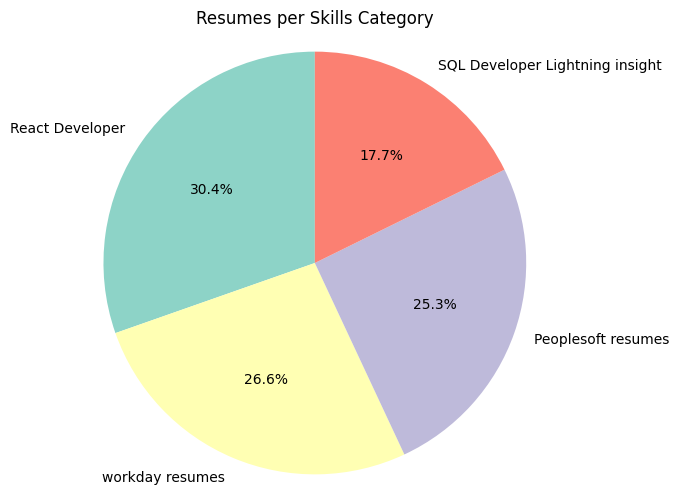

In [10]:
# Visualize the count of resumes per skills category as a pie chart
plt.figure(figsize=(6, 6))
colors = sns.color_palette('Set3', len(category_counts))
plt.pie(category_counts, labels=category_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Resumes per Skills Category')
plt.axis('equal')
plt.show()

# Visualize the count of resumes per skills category
plt.figure(figsize=(8, 5))
sns.countplot(data=resume_data, x='Skills')
plt.xticks(rotation=45)
plt.xlabel('Skills Category')
plt.ylabel('Count')
plt.title('Count of Resumes per Skills Category')
plt.show()


In [11]:
resume_data["CV"]

0     ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...
1     SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...
2     \n                                       SQL S...
3     Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...
4     \n\nCareer objective\n\n\nA rewarding opportun...
                            ...                        
74    Naveen Sadhu\n\n\n\n\n\nTitle: software develo...
75    KAMALAKAR REDDY. A \n\nLinked In: https://www....
76    HARIPRIYA BATTINA \n\nExperience as UI Develop...
77    Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...
78    SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...
Name: CV, Length: 79, dtype: object

In [12]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [13]:
import re

def cleanResume(resumeText):
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # remove non-ascii characters
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    resumeText = re.sub(r'[0-9]+', '', resumeText)  #remove numbers
    return resumeText.lower()

In [14]:
resume_data["Clean CV"] = resume_data["CV"].apply(lambda x: cleanResume(x))
#len(resume_data["Clean CV"][1])

In [15]:
resume_data

CV  \
0   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
1   SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
2   \n                                       SQL S...   
3   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
4   \n\nCareer objective\n\n\nA rewarding opportun...   
..                                                ...   
74  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...   
75  KAMALAKAR REDDY. A \n\nLinked In: https://www....   
76  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
77  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...   
78  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...   

                             Skills  \
0   SQL Developer Lightning insight   
1   SQL Developer Lightning insight   
2   SQL Developer Lightning insight   
3   SQL Developer Lightning insight   
4   SQL Developer Lightning insight   
..                              ...   
74                  React Developer   
75                  React Developer   
76                  React Developer   
77                  React Developer   
78                  React Developer   

                                             Clean CV  
0   anil kumar maddukuri sql msbi developer summar...  
1   sql server developer p syam kumar professional...  
2    sql server developer priyanka l professional ...  
3   resume name neeraj mishra experience summary h...  
4    career objective a rewarding opportunity in a...  
..                                                ...  
74  naveen sadhu title software developer location...  
75  kamalakar reddy a linked in https www linkedin...  
76  haripriya battina experience as ui developer i...  
77  thirupathamma balla summary   year of it exper...  
78  sarala madasu sarala madasu  sri geethika pres...  

[79 rows x 3 columns]

In [16]:
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')
from nltk import word_tokenize

len(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


179

In [17]:
resume_data['Cleaned_CV'] = ""
# Iterate over the rows of the dataframe
for index, row in resume_data.iterrows():
    cv = row['Clean CV']
    cleaned_cv = ""
    words = word_tokenize(cv)

    # Remove stopwords and punctuation from each word
    for word in words:
        if word.lower() not in set(stopwords.words('english')) and word not in string.punctuation:
            cleaned_cv += word + " "

    # Assign the cleaned CV to the 'Cleaned CV' column
    resume_data.at[index, 'Cleaned_CV'] = cleaned_cv.strip()

In [18]:
resume_data

CV  \
0   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
1   SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
2   \n                                       SQL S...   
3   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
4   \n\nCareer objective\n\n\nA rewarding opportun...   
..                                                ...   
74  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...   
75  KAMALAKAR REDDY. A \n\nLinked In: https://www....   
76  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
77  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...   
78  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...   

                             Skills  \
0   SQL Developer Lightning insight   
1   SQL Developer Lightning insight   
2   SQL Developer Lightning insight   
3   SQL Developer Lightning insight   
4   SQL Developer Lightning insight   
..                              ...   
74                  React Developer   
75                  React Developer   
76                  React Developer   
77                  React Developer   
78                  React Developer   

                                             Clean CV  \
0   anil kumar maddukuri sql msbi developer summar...   
1   sql server developer p syam kumar professional...   
2    sql server developer priyanka l professional ...   
3   resume name neeraj mishra experience summary h...   
4    career objective a rewarding opportunity in a...   
..                                                ...   
74  naveen sadhu title software developer location...   
75  kamalakar reddy a linked in https www linkedin...   
76  haripriya battina experience as ui developer i...   
77  thirupathamma balla summary   year of it exper...   
78  sarala madasu sarala madasu  sri geethika pres...   

                                           Cleaned_CV  
0   anil kumar maddukuri sql msbi developer summar...  
1   sql server developer p syam kumar professional...  
2   sql server developer priyanka l professional s...  
3   resume name neeraj mishra experience summary y...  
4   career objective rewarding opportunity growth ...  
..                                                ...  
74  naveen sadhu title software developer location...  
75  kamalakar reddy linked https www linkedin com ...  
76  haripriya battina experience ui developer reac...  
77  thirupathamma balla summary year experience re...  
78  sarala madasu sarala madasu sri geethika prest...  

[79 rows x 4 columns]

In [19]:
#Total words for whole resume db
# Create an empty list to store the words
total_words = []
# Iterate through each resume in the dataframe
for resume in resume_data['Cleaned_CV']:
    # Tokenize the resume into words
    words = word_tokenize(resume)
    # Filter out stopwords and punctuation
    words = [word for word in words if word.lower() not in set(stopwords.words('english')) and word not in string.punctuation]
    # Add the filtered words to the total_words list
    total_words.extend(words)

# Print the total_words list
print(total_words)

['anil', 'kumar', 'maddukuri', 'sql', 'msbi', 'developer', 'summary', 'years', 'experience', 'ms', 'sql', 'server', 'ssms', 'creating', 'ssis', 'packages', 'ssrs', 'reports', 'using', 'microsoft', 'business', 'intelligence', 'msbi', 'tools', 'expertise', 'various', 'types', 'joins', 'sub', 'queries', 'writing', 'complex', 'queries', 'involving', 'multiple', 'tables', 'handled', 'data', 'manipulation', 'data', 'consistency', 'creating', 'views', 'triggers', 'synonyms', 'hands', 'experience', 'creation', 'optimization', 'debugging', 'stored', 'procedure', 'functions', 'familiar', 'writing', 'queries', 'using', 'cte', 'temporary', 'tables', 'table', 'variables', 'good', 'experience', 'using', 'set', 'operators', 'like', 'union', 'union', 'except', 'intersect', 'assist', 'required', 'data', 'experience', 'manipulate', 'data', 'multiple', 'table', 'report', 'client', 'using', 'aggregate', 'functions', 'windows', 'functions', 'string', 'functions', 'worked', 'extensively', 'data', 'extractio

In [20]:
#Graph of most used words in the resume db
from collections import Counter
import matplotlib.pyplot as plt

# Count the occurrences of each word
word_counts = Counter(total_words)

# Get the most common words and their counts
top_words = word_counts.most_common(20)
words = [word for word, count in top_words]
counts = [count for word, count in top_words]
# Define colors for the bars
colors = ['Teal', 'cyan', 'green', 'orange', 'maroon', 'yellow', 'pink', 'grey', 'olive', 'brown']

# Plot the word bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, counts,color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Graph for CVs')
plt.xticks(rotation=45)
plt.show()

In [21]:
#Total words for Sql
# Create an empty list to store the words
total_words_sql = []

# Iterate through each resume in the dataframe
for resume, skills in zip(resume_data['Cleaned_CV'], resume_data['Skills']):
    if 'SQL Developer Lightning insight' in skills:
        # Tokenize the resume into words
        words = word_tokenize(resume)
        # Filter out stopwords and punctuation
        words = [word for word in words if word.lower() not in set(stopwords.words('english')) and word not in string.punctuation]
        # Add the filtered words to the total_words list
        total_words_sql.extend(words)

# Print the total_words list
print(total_words_sql)


['anil', 'kumar', 'maddukuri', 'sql', 'msbi', 'developer', 'summary', 'years', 'experience', 'ms', 'sql', 'server', 'ssms', 'creating', 'ssis', 'packages', 'ssrs', 'reports', 'using', 'microsoft', 'business', 'intelligence', 'msbi', 'tools', 'expertise', 'various', 'types', 'joins', 'sub', 'queries', 'writing', 'complex', 'queries', 'involving', 'multiple', 'tables', 'handled', 'data', 'manipulation', 'data', 'consistency', 'creating', 'views', 'triggers', 'synonyms', 'hands', 'experience', 'creation', 'optimization', 'debugging', 'stored', 'procedure', 'functions', 'familiar', 'writing', 'queries', 'using', 'cte', 'temporary', 'tables', 'table', 'variables', 'good', 'experience', 'using', 'set', 'operators', 'like', 'union', 'union', 'except', 'intersect', 'assist', 'required', 'data', 'experience', 'manipulate', 'data', 'multiple', 'table', 'report', 'client', 'using', 'aggregate', 'functions', 'windows', 'functions', 'string', 'functions', 'worked', 'extensively', 'data', 'extractio

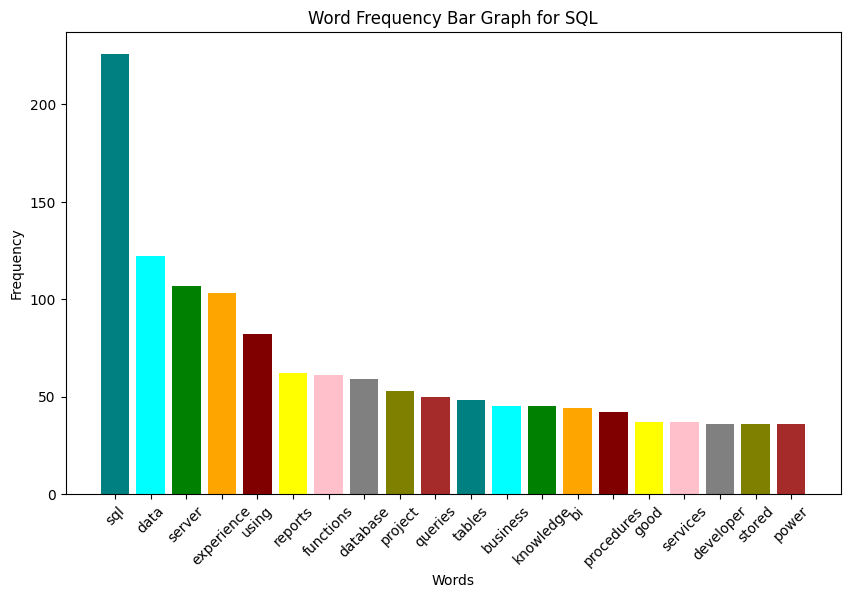

In [22]:
#Most frquent words sql
# Count the occurrences of each word
word_counts = Counter(total_words_sql)

# Get the most common words and their counts
top_words = word_counts.most_common(20)
words = [word for word, count in top_words]
counts = [count for word, count in top_words]
# Define colors for the bars
colors = ['Teal', 'cyan', 'green', 'orange', 'maroon', 'yellow', 'pink', 'grey', 'olive', 'brown']

# Plot the word bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, counts,color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Graph for SQL')
plt.xticks(rotation=45)
plt.show()

In [23]:
#Total words fpr Peoplesoft
total_words_peoplesoft = []

# Iterate through each resume in the dataframe
for resume, skills in zip(resume_data['Cleaned_CV'], resume_data['Skills']):
    if skills == 'Peoplesoft resumes':
        # Tokenize the resume into words
        words = word_tokenize(resume)
        # Filter out stopwords and punctuation
        words = [word for word in words if word.lower() not in set(stopwords.words('english')) and word not in string.punctuation]
        # Add the filtered words to the total_words_peoplesoft list
        total_words_peoplesoft.extend(words)

# Print the total_words_peoplesoft list
print(total_words_peoplesoft)

['rahul', 'ahuja', 'summary', 'years', 'experience', 'peoplesoft', 'technical', 'consultant', 'customization', 'peoplesoft', 'application', 'using', 'peoplesoft', 'x', 'x', 'people', 'tools', 'depth', 'knowledge', 'peopletools', 'like', 'application', 'designer', 'peoplecode', 'application', 'engine', 'application', 'package', 'ps', 'security', 'file', 'layout', 'xml', 'publisher', 'data', 'mover', 'integration', 'broker', 'workflow', 'notification', 'awe', 'web', 'services', 'worked', 'extensively', 'application', 'engine', 'peoplecdoe', 'file', 'layout', 'application', 'package', 'awe', 'env', 'refresh', 'upgrade', 'activities', 'experience', 'implementation', 'projects', 'fair', 'knowledge', 'peoplesoft', 'reporting', 'tools', 'ps', 'query', 'worked', 'component', 'interface', 'excellent', 'knowledge', 'agile', 'methodology', 'self', 'motivated', 'person', 'strong', 'debugging', 'problem', 'solving', 'analytical', 'skills', 'better', 'understanding', 'application', 'development', 'm

In [24]:
#Most frquent words Peoplesoft
# Count the occurrences of each word
word_counts = Counter(total_words_peoplesoft)

# Get the most common words and their counts
top_words = word_counts.most_common(20)
words = [word for word, count in top_words]
counts = [count for word, count in top_words]
# Define colors for the bars
colors = ['Teal', 'cyan', 'green', 'orange', 'maroon', 'yellow', 'pink', 'grey', 'olive', 'brown']

# Plot the word bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, counts,color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Graph for Peoplesoft')
plt.xticks(rotation=45)
plt.show()

In [25]:
#Total words for Workday
total_words_workday = []

# Iterate through each resume in the dataframe
for resume, skills in zip(resume_data['Cleaned_CV'], resume_data['Skills']):
    if skills == 'workday resumes':
        # Tokenize the resume into words
        words = word_tokenize(resume)
        # Filter out stopwords and punctuation
        words = [word for word in words if word.lower() not in set(stopwords.words('english')) and word not in string.punctuation]
        # Add the filtered words to the total_words_peoplesoft list
        total_words_workday.extend(words)

# Print the total_words_peoplesoft list
print(total_words_workday)

['srikanth', 'workday', 'hcm', 'consultant', 'seeking', 'suitable', 'positions', 'workday', 'hcm', 'techno', 'functional', 'consultant', 'reputed', 'organization', 'would', 'help', 'utilize', 'skills', 'grow', 'individual', 'deliver', 'organization', 'growth', 'professional', 'experience', 'years', 'serving', 'notice', 'highlights', 'workday', 'integration', 'studio', 'core', 'hcm', 'recruiting', 'benefits', 'leave', 'absence', 'trainings', 'core', 'financials', 'integration', 'workday', 'studio', 'strong', 'eib', 'inbound', 'outbound', 'reports', 'calculated', 'fields', 'custom', 'objects', 'business', 'process', 'dashboards', 'ccw', 'picof', 'calc', 'fields', 'birt', 'worked', 'implementations', 'configuration', 'security', 'business', 'process', 'achievements', 'successfully', 'completed', 'major', 'project', 'implementations', 'kt', 'new', 'hires', 'provide', 'training', 'internally', 'technical', 'skills', 'workday', 'hcm', 'core', 'hcm', 'recruiting', 'lms', 'report', 'writer', '

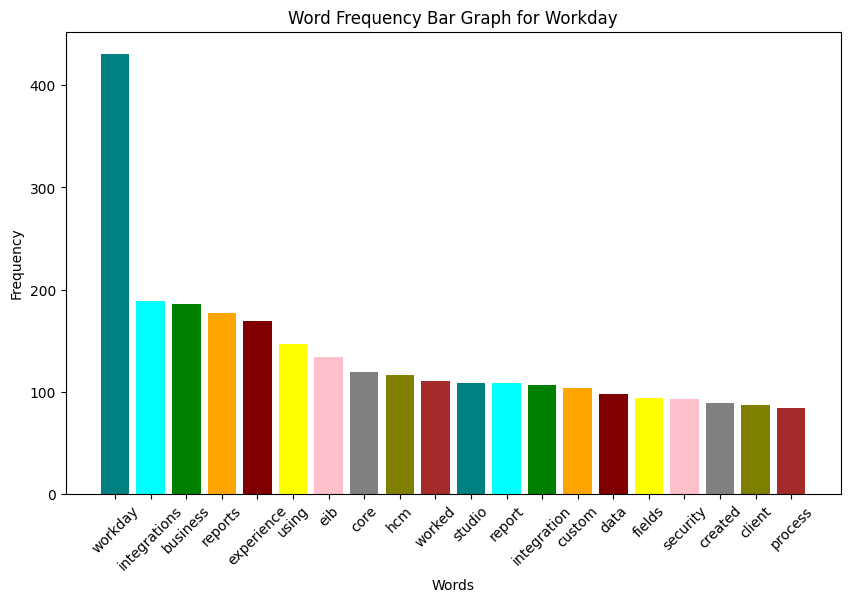

In [26]:
#Most frquent words Workday
# Count the occurrences of each word
word_counts = Counter(total_words_workday)

# Get the most common words and their counts
top_words = word_counts.most_common(20)
words = [word for word, count in top_words]
counts = [count for word, count in top_words]
# Define colors for the bars
colors = ['Teal', 'cyan', 'green', 'orange', 'maroon', 'yellow', 'pink', 'grey', 'olive', 'brown']

# Plot the word bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, counts,color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Graph for Workday')
plt.xticks(rotation=45)
plt.show()

In [27]:
#Total words fpr React Developer
total_words_react = []

# Iterate through each resume in the dataframe
for resume, skills in zip(resume_data['Cleaned_CV'], resume_data['Skills']):
    if skills == 'React Developer':
        # Tokenize the resume into words
        words = word_tokenize(resume)
        # Filter out stopwords and punctuation
        words = [word for word in words if word.lower() not in set(stopwords.words('english')) and word not in string.punctuation]
        # Add the filtered words to the total_words_peoplesoft list
        total_words_react.extend(words)

# Print the total_words_peoplesoft list
print(total_words_react)

['kotani', 'durga', 'prasad', 'objective', 'aspirant', 'position', 'organization', 'contribute', 'skills', 'organization', 'success', 'synchronize', 'new', 'technologies', 'resourceful', 'innovative', 'flexible', 'professional', 'summary', 'years', 'experience', 'software', 'engineer', 'highly', 'creative', 'web', 'designer', 'front', 'end', 'developer', 'experience', 'working', 'diverse', 'range', 'projects', 'small', 'business', 'websites', 'large', 'scale', 'websites', 'global', 'user', 'base', 'excellent', 'knowledge', 'html', 'html', 'css', 'bootstrap', 'frameworks', 'strong', 'hands', 'experience', 'hand', 'coding', 'web', 'technologies', 'good', 'knowledge', 'designing', 'developing', 'web', 'pages', 'based', 'seo', 'search', 'engine', 'optimization', 'wc', 'standards', 'cross', 'browser', 'compatibility', 'good', 'knowledge', 'client', 'side', 'programming', 'javascript', 'jquery', 'working', 'knowledge', 'react', 'js', 'experience', 'developing', 'fully', 'responsive', 'websit

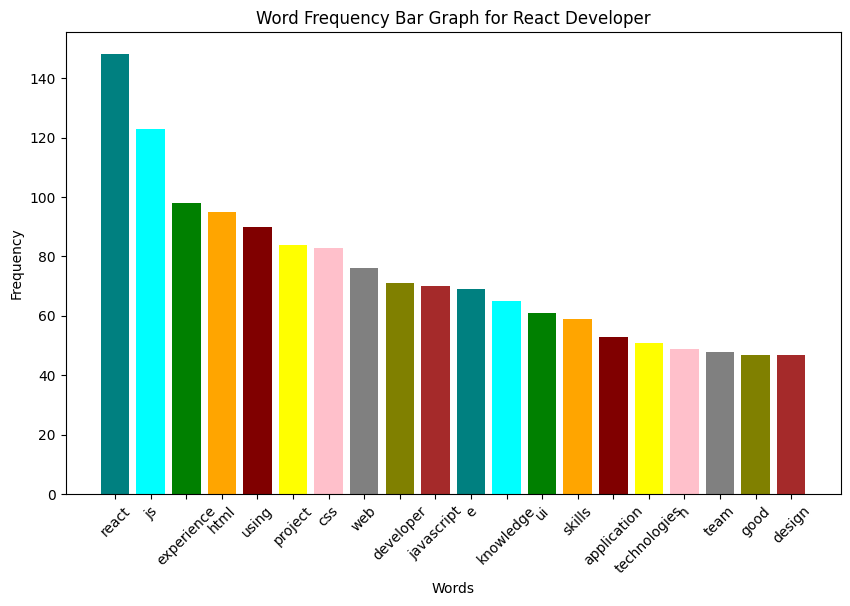

In [28]:
#Most frquent words React Developer
# Count the occurrences of each word
word_counts = Counter(total_words_react)

# Get the most common words and their counts
top_words = word_counts.most_common(20)
words = [word for word, count in top_words]
counts = [count for word, count in top_words]
# Define colors for the bars
colors = ['Teal', 'cyan', 'green', 'orange', 'maroon', 'yellow', 'pink', 'grey', 'olive', 'brown']

# Plot the word bar graph
plt.figure(figsize=(10, 6))
plt.bar(words, counts,color=colors)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Bar Graph for React Developer')
plt.xticks(rotation=45)
plt.show()

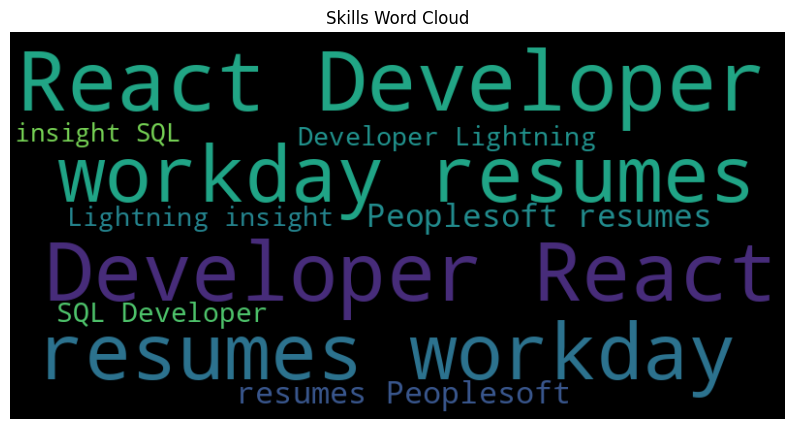

In [29]:
from wordcloud import WordCloud
skills_text = ' '.join(resume_data['Skills'])
wordcloud = WordCloud(width=800, height=400).generate(skills_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Skills Word Cloud')
plt.show()

In [30]:
# Concatenate all the resume text
resume_text = ' '.join(resume_data['Cleaned_CV'])

# Create word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(resume_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Resume Word Cloud')
plt.show()

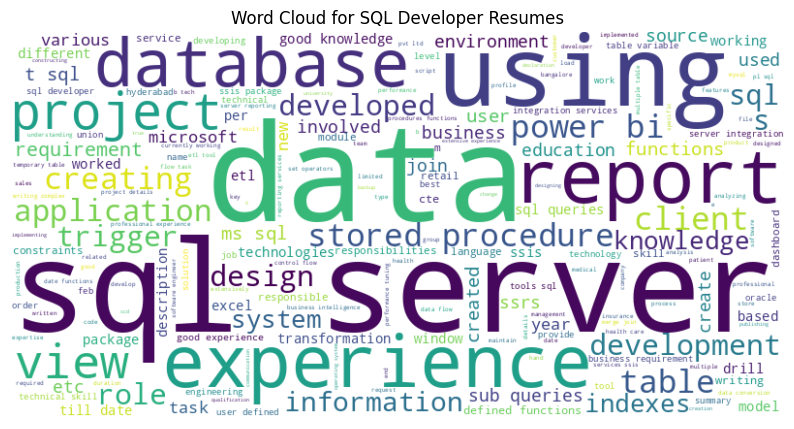

In [31]:
#Word cloud for SQL
# Filter the data based on the desired skill (e.g., SQL)
sql_data = resume_data[resume_data['Skills'] == 'SQL Developer Lightning insight']

# Concatenate the cleaned CVs for the skill
sql_resumes = ' '.join(sql_data['Clean CV'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sql_resumes)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for SQL Developer Resumes')
plt.show()

In [32]:
# Generate word cloud for React Developer
react_developer_text = ' '.join(resume_data[resume_data['Skills'] == 'React Developer']['Cleaned_CV'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(react_developer_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for React Developer')
plt.axis('off')
plt.show()







In [33]:
# Generate word cloud for workday

workday_text = ' '.join(resume_data[resume_data['Skills'] == 'workday resumes']['Cleaned_CV'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(workday_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for workday')
plt.axis('off')
plt.show()

In [34]:
#Wordcloud for Peoplesoft
peoplesoft_text = ' '.join(resume_data.loc[resume_data['Skills'] == 'Peoplesoft resumes', 'Cleaned_CV'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(peoplesoft_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Peoplesoft Resumes')
plt.show()

In [35]:
!python -m spacy download en


2023-07-27 11:07:04.470358: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 39.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
# Load the pre-trained English language model in spaCy
nlp = spacy.load('en_core_web_sm')

In [37]:
# Function to extract named entities from text
def apply_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities


In [38]:
# Apply named entity extraction to the 'Text' column of the resume data
resume_data['NamedEntities'] = resume_data['Cleaned_CV'].apply(apply_ner)

# Display the resume data with named entities
print(resume_data[['Cleaned_CV', 'NamedEntities']])


                                           Cleaned_CV  \
0   anil kumar maddukuri sql msbi developer summar...   
1   sql server developer p syam kumar professional...   
2   sql server developer priyanka l professional s...   
3   resume name neeraj mishra experience summary y...   
4   career objective rewarding opportunity growth ...   
..                                                ...   
74  naveen sadhu title software developer location...   
75  kamalakar reddy linked https www linkedin com ...   
76  haripriya battina experience ui developer reac...   
77  thirupathamma balla summary year experience re...   
78  sarala madasu sarala madasu sri geethika prest...   

                                        NamedEntities  
0   [(anil kumar maddukuri sql msbi, PERSON), (yea...  
1   [(sql server, ORG), (years, DATE), (microsoft,...  
2   [(sql server, ORG), (years, DATE), (microsoft ...  
3   [(summary year month, DATE), (sql, ORG), (one,...  
4   [(years, DATE), (microsoft, ORG

In [39]:
resume_data

CV  \
0   ANIL KUMAR MADDUKURI  \t\t\n\nSQL & MSBI Devel...   
1   SQL SERVER DEVELOPER\n\n\n\n\n\nP. Syam Kumar ...   
2   \n                                       SQL S...   
3   Resume\n\nName     :  Neeraj Mishra\n\n\n\nExp...   
4   \n\nCareer objective\n\n\nA rewarding opportun...   
..                                                ...   
74  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...   
75  KAMALAKAR REDDY. A \n\nLinked In: https://www....   
76  HARIPRIYA BATTINA \n\nExperience as UI Develop...   
77  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...   
78  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...   

                             Skills  \
0   SQL Developer Lightning insight   
1   SQL Developer Lightning insight   
2   SQL Developer Lightning insight   
3   SQL Developer Lightning insight   
4   SQL Developer Lightning insight   
..                              ...   
74                  React Developer   
75                  React Developer   
76                  React Developer   
77                  React Developer   
78                  React Developer   

                                             Clean CV  \
0   anil kumar maddukuri sql msbi developer summar...   
1   sql server developer p syam kumar professional...   
2    sql server developer priyanka l professional ...   
3   resume name neeraj mishra experience summary h...   
4    career objective a rewarding opportunity in a...   
..                                                ...   
74  naveen sadhu title software developer location...   
75  kamalakar reddy a linked in https www linkedin...   
76  haripriya battina experience as ui developer i...   
77  thirupathamma balla summary   year of it exper...   
78  sarala madasu sarala madasu  sri geethika pres...   

                                           Cleaned_CV  \
0   anil kumar maddukuri sql msbi developer summar...   
1   sql server developer p syam kumar professional...   
2   sql server developer priyanka l professional s...   
3   resume name neeraj mishra experience summary y...   
4   career objective rewarding opportunity growth ...   
..                                                ...   
74  naveen sadhu title software developer location...   
75  kamalakar reddy linked https www linkedin com ...   
76  haripriya battina experience ui developer reac...   
77  thirupathamma balla summary year experience re...   
78  sarala madasu sarala madasu sri geethika prest...   

                                        NamedEntities  
0   [(anil kumar maddukuri sql msbi, PERSON), (yea...  
1   [(sql server, ORG), (years, DATE), (microsoft,...  
2   [(sql server, ORG), (years, DATE), (microsoft ...  
3   [(summary year month, DATE), (sql, ORG), (one,...  
4   [(years, DATE), (microsoft, ORG), (secondary b...  
..                                                ...  
74  [(india, GPE), (pvt ltd technology, ORG), (eng...  
75  [(https, PERSON), (years, DATE), (js redux, PE...  
76  [(haripriya battina, PERSON), (gmail haripriya...  
77  [(thirupathamma, PERSON), (year, DATE), (year,...  
78  [(sarala madasu sarala madasu, ORG), (objectiv...  

[79 rows x 5 columns]

In [40]:
from spacy import displacy

# Load the pre-trained spaCy model with NER
nlp = spacy.load('en_core_web_sm')

# Function to apply displacy visualization to a text
def apply_displacy(text):
    doc = nlp(text)
    displacy.render(doc, style='ent', jupyter=True)

# Apply displacy visualization to the 'CV' column
resume_data['Cleaned_CV'].apply(apply_displacy)

0     None
1     None
2     None
3     None
4     None
      ... 
74    None
75    None
76    None
77    None
78    None
Name: Cleaned_CV, Length: 79, dtype: object

In [41]:
#Vectorization using TF-IDF for resume dataset
from sklearn.feature_extraction.text import TfidfVectorizer
# Create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True,
    stop_words='english')

# Fit and transform the 'Cleaned_CV' column to compute TF-IDF values
tfidf_matrix = tfidf_vectorizer.fit_transform(resume_data['Cleaned_CV'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the TF-IDF DataFrame
print(tfidf_df)

    abdul  abilities   ability      able  abreast  abs  absence  absent  \
0     0.0   0.000000  0.000000  0.000000      0.0  0.0      0.0     0.0   
1     0.0   0.000000  0.000000  0.000000      0.0  0.0      0.0     0.0   
2     0.0   0.000000  0.000000  0.000000      0.0  0.0      0.0     0.0   
3     0.0   0.000000  0.034006  0.069822      0.0  0.0      0.0     0.0   
4     0.0   0.064407  0.000000  0.000000      0.0  0.0      0.0     0.0   
..    ...        ...       ...       ...      ...  ...      ...     ...   
74    0.0   0.000000  0.089299  0.000000      0.0  0.0      0.0     0.0   
75    0.0   0.000000  0.038820  0.000000      0.0  0.0      0.0     0.0   
76    0.0   0.000000  0.000000  0.000000      0.0  0.0      0.0     0.0   
77    0.0   0.000000  0.088013  0.000000      0.0  0.0      0.0     0.0   
78    0.0   0.061917  0.000000  0.000000      0.0  0.0      0.0     0.0   

    abstract  abstraction  ...    yonder  york  young  yrs  zealand  zenefits  \
0        0.0      

In [42]:
# Compute the average TF-IDF score for each word
average_tfidf_scores = tfidf_df.mean()
# Sort the average TF-IDF scores in descending order
sorted_tfidf_scores = average_tfidf_scores.sort_values(ascending=False)

In [43]:
# Get the top 10 words with the highest TF-IDF scores
top_10_words = sorted_tfidf_scores.head(10)
top_10_words



experience     0.042261
using          0.036762
project        0.035586
workday        0.035438
application    0.033911
data           0.032840
reports        0.031860
peoplesoft     0.031774
business       0.031182
sql            0.031012
dtype: float64

In [44]:
# Get the top 20 words with the highest TF-IDF scores
top_20_words = sorted_tfidf_scores.head(20)
top_20_words

experience     0.042261
using          0.036762
project        0.035586
workday        0.035438
application    0.033911
data           0.032840
reports        0.031860
peoplesoft     0.031774
business       0.031182
sql            0.031012
server         0.030594
react          0.030201
web            0.029642
knowledge      0.029476
worked         0.028285
client         0.028204
development    0.027816
hcm            0.027790
support        0.027393
skills         0.027290
dtype: float64

In [45]:
 #Vizualization of top 20 words
top_n = 20  # Number of top words to visualize
top_words = tfidf_df.sum().sort_values(ascending=False).head(top_n)

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(top_words.index, top_words.values)
plt.xlabel('Words')
plt.ylabel('TF-IDF Value')
plt.title('Top {} Words by TF-IDF for resumes'.format(top_n))
plt.xticks(rotation=45)
plt.show()

In [46]:
#Tf-IDF for sql
sql_developer_resumes = resume_data[resume_data['Skills'] == 'SQL Developer Lightning insight']
corpus_sql_developer = sql_developer_resumes['Cleaned_CV'].tolist()
tfidf_matrix_sql_developer = tfidf_vectorizer.fit_transform(corpus_sql_developer)
tfidf_df_sql_developer = pd.DataFrame(tfidf_matrix_sql_developer.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df_sql_developer)

    abilities   ability      able  abstract  academic    access  accessories  \
0    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000   
3    0.000000  0.045641  0.065569  0.000000  0.000000  0.000000     0.000000   
4    0.076532  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000   
5    0.000000  0.000000  0.000000  0.000000  0.073833  0.000000     0.000000   
6    0.000000  0.000000  0.000000  0.000000  0.000000  0.040283     0.046542   
7    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000     0.000000   
8    0.000000  0.000000  0.000000  0.000000  0.053303  0.000000     0.000000   
9    0.000000  0.045156  0.000000  0.000000  0.000000  0.133986     0.000000   
10   0.000000  0.043417  0.000000  0.000000  0.000000  0.000000     0.000000   
11   0.000000  0.000000  0.000000  0.000

In [47]:
feature_names_sql = tfidf_vectorizer.get_feature_names_out()
feature_names_sql

array(['abilities', 'ability', 'able', ..., 'xp', 'year', 'years'],
      dtype=object)

In [48]:
# Compute the average TF-IDF score for each word
average_tfidf_scores = tfidf_df_sql_developer.sum()
# Sort the average TF-IDF scores in descending order
sorted_tfidf_scores = average_tfidf_scores.sort_values(ascending=False)
# Get the top 10 words with the highest TF-IDF scores
top_10_words = sorted_tfidf_scores.head(10)
top_10_words



sql           1.142024
server        0.912315
experience    0.900737
data          0.894429
using         0.762874
functions     0.749969
project       0.688135
tables        0.684353
queries       0.677045
database      0.673611
dtype: float64

In [49]:
# Get the top 20 words with the highest TF-IDF scores
sorted_tfidf_scores.head(20)


sql           1.142024
server        0.912315
experience    0.900737
data          0.894429
using         0.762874
functions     0.749969
project       0.688135
tables        0.684353
queries       0.677045
database      0.673611
knowledge     0.641635
good          0.629298
procedures    0.611297
reports       0.608032
ssis          0.601973
date          0.583762
services      0.581617
views         0.577100
business      0.570111
developer     0.562053
dtype: float64

In [50]:
 #Vizualization of top 20 words
top_n = 20  # Number of top words to visualize
top_words = tfidf_df_sql_developer.sum().sort_values(ascending=False).head(top_n)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(top_words.index, top_words.values)
plt.xlabel('Words')
plt.ylabel('TF-IDF Value')
plt.title('Top {} Words by TF-IDF for Sql'.format(top_n))
plt.xticks(rotation=45)
plt.show()

In [51]:
#Tf-IDF for react developer
react_developer_resumes = resume_data[resume_data['Skills'] == 'React Developer']
corpus_react_developer = react_developer_resumes['Cleaned_CV'].tolist()
tfidf_matrix_react_developer = tfidf_vectorizer.fit_transform(corpus_react_developer)
tfidf_df_react_developer = pd.DataFrame(tfidf_matrix_react_developer.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df_react_developer)

       abdul  abilities   ability      able  abstraction  academic  \
0   0.000000   0.000000  0.071342  0.000000     0.000000  0.000000   
1   0.000000   0.000000  0.000000  0.000000     0.000000  0.000000   
2   0.000000   0.000000  0.000000  0.000000     0.000000  0.000000   
3   0.000000   0.000000  0.000000  0.000000     0.000000  0.000000   
4   0.000000   0.000000  0.000000  0.000000     0.000000  0.000000   
5   0.000000   0.000000  0.000000  0.000000     0.000000  0.000000   
6   0.000000   0.000000  0.000000  0.000000     0.000000  0.058324   
7   0.000000   0.000000  0.000000  0.000000     0.000000  0.000000   
8   0.000000   0.000000  0.081295  0.000000     0.000000  0.000000   
9   0.000000   0.000000  0.000000  0.000000     0.000000  0.071026   
10  0.000000   0.000000  0.000000  0.000000     0.000000  0.046889   
11  0.156462   0.000000  0.107957  0.000000     0.000000  0.000000   
12  0.000000   0.000000  0.000000  0.000000     0.000000  0.000000   
13  0.000000   0.000

In [52]:
feature_names_react = tfidf_vectorizer.get_feature_names_out()
feature_names_react

array(['abdul', 'abilities', 'ability', ..., 'young', 'zerozilla', 'zp'],
      dtype=object)

In [53]:
# Compute the average TF-IDF score for each word
average_tfidf_scores = tfidf_df_react_developer.mean()
# Sort the average TF-IDF scores in descending order
sorted_tfidf_scores = average_tfidf_scores.sort_values(ascending=False)
# Get the top 10 words with the highest TF-IDF scores
top_20_words = sorted_tfidf_scores.head(20)
top_20_words

react           0.059776
js              0.055240
html            0.051573
experience      0.050383
css             0.049043
using           0.047724
javascript      0.046213
project         0.046185
web             0.043971
developer       0.042837
ui              0.042631
skills          0.041832
team            0.038988
development     0.037616
bootstrap       0.037349
knowledge       0.037321
working         0.037318
technologies    0.037297
application     0.036672
work            0.034297
dtype: float64

In [54]:
 #Vizualization of top 20 words
top_n = 20  # Number of top words to visualize
top_words = tfidf_df_react_developer.sum().sort_values(ascending=False).head(top_n)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(top_words.index, top_words.values)
plt.xlabel('Words')
plt.ylabel('TF-IDF Value')
plt.title('Top {} Words by TF-IDF for React Developer'.format(top_n))
plt.xticks(rotation=45)
plt.show()

In [55]:
#Tf-IDF for workday
workday_developer_resumes = resume_data[resume_data['Skills'] == 'workday resumes']
corpus_workday_developer = workday_developer_resumes['Cleaned_CV'].tolist()
tfidf_matrix_workday_developer = tfidf_vectorizer.fit_transform(corpus_workday_developer)
tfidf_df_workday_developer = pd.DataFrame(tfidf_matrix_workday_developer.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df_workday_developer)

    abilities   ability       abs   absence    absent  academics  accenture  \
0    0.000000  0.030372  0.000000  0.094166  0.000000    0.00000   0.000000   
1    0.000000  0.000000  0.000000  0.000000  0.000000    0.00000   0.000000   
2    0.000000  0.030124  0.000000  0.053680  0.000000    0.00000   0.000000   
3    0.000000  0.030305  0.067475  0.000000  0.000000    0.00000   0.000000   
4    0.000000  0.037825  0.000000  0.039809  0.000000    0.00000   0.000000   
5    0.000000  0.000000  0.000000  0.028697  0.000000    0.00000   0.000000   
6    0.000000  0.032319  0.000000  0.000000  0.000000    0.00000   0.000000   
7    0.000000  0.032496  0.000000  0.057907  0.000000    0.00000   0.000000   
8    0.000000  0.035686  0.000000  0.000000  0.000000    0.00000   0.134532   
9    0.000000  0.033742  0.000000  0.000000  0.000000    0.00000   0.000000   
10   0.000000  0.019514  0.000000  0.043100  0.000000    0.00000   0.000000   
11   0.000000  0.025657  0.000000  0.045720  0.05712

In [56]:
feature_names_workday = tfidf_vectorizer.get_feature_names_out()
feature_names_workday

array(['abilities', 'ability', 'abs', ..., 'yrs', 'zealand', 'zenefits'],
      dtype=object)

In [57]:
# Compute the average TF-IDF score for each word
average_tfidf_scores = tfidf_df_workday_developer.mean()
# Sort the average TF-IDF scores in descending order
sorted_tfidf_scores = average_tfidf_scores.sort_values(ascending=False)
# Get the top 10 words with the highest TF-IDF scores
top_20_words = sorted_tfidf_scores.head(20)
top_20_words

workday         0.080005
experience      0.061970
reports         0.061265
integrations    0.061174
business        0.060781
eib             0.055472
studio          0.054600
using           0.053770
core            0.051915
hcm             0.050556
integration     0.050369
report          0.050200
worked          0.049900
custom          0.049812
fields          0.048102
xml             0.047532
created         0.047478
data            0.045927
support         0.045917
xslt            0.045853
dtype: float64

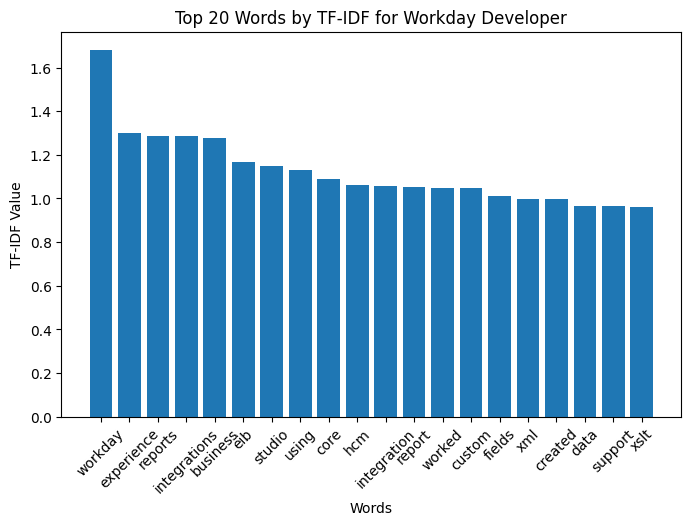

In [58]:
 #Vizualization of top 20 words
top_n = 20  # Number of top words to visualize
top_words = tfidf_df_workday_developer.sum().sort_values(ascending=False).head(top_n)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(top_words.index, top_words.values)
plt.xlabel('Words')
plt.ylabel('TF-IDF Value')
plt.title('Top {} Words by TF-IDF for Workday Developer'.format(top_n))
plt.xticks(rotation=45)
plt.show()

In [59]:
#Tf-IDF for peoplesoft
peoplesoft_developer_resumes = resume_data[resume_data['Skills'] == 'Peoplesoft resumes']
corpus_peoplesoft_developer = peoplesoft_developer_resumes['Cleaned_CV'].tolist()
tfidf_matrix_peoplesoft_developer = tfidf_vectorizer.fit_transform(corpus_peoplesoft_developer)
tfidf_df_peoplesoft_developer = pd.DataFrame(tfidf_matrix_peoplesoft_developer.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df_peoplesoft_developer)


    abilities   ability  abreast  academic  accenture  acceptable  acceptance  \
0    0.000000  0.053340  0.00000  0.000000   0.000000    0.000000    0.000000   
1    0.000000  0.000000  0.00000  0.000000   0.000000    0.000000    0.000000   
2    0.000000  0.066722  0.00000  0.176535   0.000000    0.000000    0.000000   
3    0.000000  0.000000  0.00000  0.000000   0.000000    0.000000    0.000000   
4    0.000000  0.000000  0.00000  0.000000   0.000000    0.000000    0.000000   
5    0.000000  0.000000  0.00000  0.000000   0.000000    0.000000    0.083215   
6    0.000000  0.000000  0.00000  0.000000   0.000000    0.000000    0.000000   
7    0.000000  0.075869  0.00000  0.000000   0.000000    0.032222    0.000000   
8    0.000000  0.000000  0.00000  0.000000   0.000000    0.000000    0.000000   
9    0.000000  0.000000  0.00000  0.000000   0.000000    0.000000    0.000000   
10   0.000000  0.000000  0.06329  0.000000   0.000000    0.000000    0.000000   
11   0.000000  0.000000  0.0

In [60]:
feature_names_peoplesoft = tfidf_vectorizer.get_feature_names_out()
feature_names_peoplesoft

array(['abilities', 'ability', 'abreast', ..., 'zero', 'zones', 'zp'],
      dtype=object)

In [61]:
# Compute the average TF-IDF score for each word
average_tfidf_scores = tfidf_df_peoplesoft_developer.mean()
# Sort the average TF-IDF scores in descending order
sorted_tfidf_scores = average_tfidf_scores.sort_values(ascending=False)
# Get the top 10 words with the highest TF-IDF scores
top_20_words = sorted_tfidf_scores.head(20)
top_20_words

peoplesoft      0.066933
application     0.061760
server          0.051078
people          0.049969
experience      0.049576
tools           0.047731
project         0.046101
oracle          0.045240
process         0.044084
database        0.043853
web             0.042494
production      0.042040
support         0.041916
fscm            0.041819
servers         0.041281
environment     0.040373
scheduler       0.040213
windows         0.039811
hcm             0.039693
applications    0.039430
dtype: float64

In [62]:
#Vizualization of top 20 words
top_n = 20  # Number of top words to visualize
top_words = tfidf_df_peoplesoft_developer.sum().sort_values(ascending=False).head(top_n)

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(top_words.index, top_words.values)
plt.xlabel('Words')
plt.ylabel('TF-IDF Value')
plt.title('Top {} Words by TF-IDF for Peoplesoft Developer'.format(top_n))
plt.xticks(rotation=45)
plt.show()

In [63]:
# Find the intersection of words across all skill sets
common_words = set(feature_names_sql).intersection(feature_names_react, feature_names_workday, feature_names_peoplesoft)

# Print the common words
print("Common Words across all skill sets:", common_words)

Common Words across all skill sets: {'based', 'extensively', 'workflows', 'problem', 'talent', 'changes', 'applications', 'coordinating', 'date', 'day', 'debugging', 'layout', 'like', 'november', 'institute', 'include', 'power', 'achievements', 'qualification', 'framework', 'total', 'performed', 'experience', 'retailer', 'weekly', 'required', 'mar', 'exposure', 'maintain', 'analyzing', 'percentage', 'specific', 'skills', 'expertise', 'best', 'excellent', 'domain', 'educational', 'indian', 'different', 'technical', 'services', 'suite', 'daily', 'national', 'achieve', 'billing', 'pvt', 'customer', 'company', 'project', 'microsoft', 'setting', 'packages', 'tool', 'challenging', 'document', 'process', 'created', 'unit', 'location', 'environments', 'develop', 'employees', 'knowledge', 'components', 'core', 'engineering', 'configuration', 'skill', 'processing', 'highly', 'program', 'regression', 'target', 'objectives', 'files', 'designation', 'linux', 'description', 'information', 'make', 'a

In [64]:
for index, row in resume_data.iterrows():
    cleaned_cv = row['Cleaned_CV']
    # Split the cleaned_cv text into individual words
    words = cleaned_cv.split()
    # Remove common words from the list of words
    cleaned_words = [word for word in words if word not in common_words]
    # Join the cleaned words back into a single string
    cleaned_text = ' '.join(cleaned_words)
    # Update the Cleaned_CV column with the cleaned_text
    resume_data.at[index, 'Cleaned_CV'] = cleaned_text

In [65]:
#Encoding the data
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
#Cleaned_CV = encoder.fit_transform(resume_data['Cleaned_CV'])
Skills_encoded = encoder.fit_transform(resume_data['Skills'])
resume_data['Skills_encoded'] = Skills_encoded
resume_data.tail(40)

CV           Skills  \
39  WORKDAY | HCM | FCM\n\nName \t\t: Kumar S.S\n\...  workday resumes   
40  JYOTI VERMA\t\t\t\t\t\n\n\n\nPROFESSIONAL SUMM...  workday resumes   
41  Mooraboyina Guravaiah\n\nWorkday Integration S...  workday resumes   
42  \nHIMA.MENDU\n\n\n\nCareer Objective\nTo conti...  workday resumes   
43  G Himaja\n\n                                  ...  workday resumes   
44  \nShireesh                                    ...  workday resumes   
45  \n                               Hari Krishna ...  workday resumes   
46  \nVenkateswarlu.B                             ...  workday resumes   
47  \n\n                             Madeeswar A\n...  workday resumes   
48  \nHarikrishna Akula\n\n\n\n Summary:\n    ❖ 5....  workday resumes   
49  Workday HCM  Techno functional Consultant     ...  workday resumes   
50  Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...  workday resumes   
51  VENKATA SAIKRISHNA\n\n Workday Consultant\n\n\...  workday resumes   
52  \n  [pic]\n  [pic]\n\n    • 3.3 years of IT ex...  workday resumes   
53  Name         : Gopi Krishna Reddy\n\n\t\t\t\t ...  workday resumes   
54  \nName  : Naresh Babu Cherukuri\n\n\nObjective...  workday resumes   
55  Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...  React Developer   
56  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React Developer   
57   \n\n \n\nName: M. Prabakaran \nTitle: UI Deve...  React Developer   
58  Pranish Sonone\n\n\t\t\n\n\n\n\n\n\n\n\n\nCare...  React Developer   
59  Ui-Developer/ React JS Developer \n\nNAME: KRI...  React Developer   
60  \nMaryala Vinay Reddy\n\nProfessional Summary:...  React Developer   
61  KAMBALA SAI SURENDRA   \n\n \n\n \n\n \n\n\n\n...  React Developer   
62  MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...  React Developer   
63  PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...  React Developer   
64  SUSOVAN  BAG   \n\nSeeking  a  challenging  po...  React Developer   
65  Kanumuru Deepak Reddy\n\n\n\n\t\n\n\n\nCAREER ...  React Developer   
66  SHAIK ABDUL SHARUK   \n\n2 years’ Experience i...  React Developer   
67  Ranga Gaganam  \n\n\n\n \n\nProfessional\n\n \...  React Developer   
68  Venkatalakshmi Pedireddy\n\nSoftware Developer...  React Developer   
69  MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n   ...  React Developer   
70  Name: Ravali P \n\n\n\n                       ...  React Developer   
71  \n [pic]\n\nPROFILE\n\n Searching for the oppo...  React Developer   
72  \n                              CURRICULUM VIT...  React Developer   
73  MAREEDU LOKESH BABU\n\n\n\nPROFESSIONAL OVERVI...  React Developer   
74  Naveen Sadhu\n\n\n\n\n\nTitle: software develo...  React Developer   
75  KAMALAKAR REDDY. A \n\nLinked In: https://www....  React Developer   
76  HARIPRIYA BATTINA \n\nExperience as UI Develop...  React Developer   
77  Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...  React Developer   
78  SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...  React Developer   

                                             Clean CV  \
39  workday hcm fcm name kumar s s role workday co...   
40  jyoti verma professional summary professional ...   
41  mooraboyina guravaiah workday integration spec...   
42   hima mendu career objective to continue growi...   
43  g himaja career objective to work towards achi...   
44   shireesh balasani hcm consultant profile summ...   
45   hari krishna m summary a result oriented prof...   
46   venkateswarlu b workday consultant having   y...   
47   madeeswar a profile summary having around  ye...   
48   harikrishna akula summary   years of it exper...   
49  workday hcm techno functional consultant rahul...   
50  chinna subbarayudu m dob th march  nationality...   
51  venkata saikrishna workday consultant profssio...   
52   pic pic   years of it experience as workday h...   
53  name gopi krishna reddy professional summery w...   
54   name naresh babu cherukuri objective to take ...   
55  kotani durga prasad objective aspirant for 

#Model Building

In [66]:
#Model Building using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix


In [67]:
# Fit and transform the 'Cleaned_CV' column to compute TF-IDF values
tfidf_matrix = tfidf_vectorizer.fit_transform(resume_data['Cleaned_CV'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the TF-IDF DataFrame
print(tfidf_df)

    abdul      able  abreast  abs  absence  absent  abstract  abstraction  \
0     0.0  0.000000      0.0  0.0      0.0     0.0       0.0          0.0   
1     0.0  0.000000      0.0  0.0      0.0     0.0       0.0          0.0   
2     0.0  0.000000      0.0  0.0      0.0     0.0       0.0          0.0   
3     0.0  0.084085      0.0  0.0      0.0     0.0       0.0          0.0   
4     0.0  0.000000      0.0  0.0      0.0     0.0       0.0          0.0   
..    ...       ...      ...  ...      ...     ...       ...          ...   
74    0.0  0.000000      0.0  0.0      0.0     0.0       0.0          0.0   
75    0.0  0.000000      0.0  0.0      0.0     0.0       0.0          0.0   
76    0.0  0.000000      0.0  0.0      0.0     0.0       0.0          0.0   
77    0.0  0.000000      0.0  0.0      0.0     0.0       0.0          0.0   
78    0.0  0.000000      0.0  0.0      0.0     0.0       0.0          0.0   

    academic  academics  ...    yonder  york  young  yrs  zealand  zenefits

In [68]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(tfidf_df.values, Skills_encoded, test_size=0.2, random_state=42)

# Train the logistic regression model with OvR strategy
classifier_lr = OneVsRestClassifier(LogisticRegression()) #as LR is a binary classifier, we use OvR to work with multiple output classes
classifier_lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = classifier_lr.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_lr))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.93        16
weighted avg       0.95      0.94      0.94        16



In [69]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
report_lr =classification_report(y_test, y_pred_lr,output_dict=True)
f1_score_lr = round(report_lr['weighted avg']['f1-score'],2)
precision_lr = round(report_lr['weighted avg']['precision'],2)
recall_lr = round(report_lr['weighted avg']['recall'],2)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr),2)

print(cm_lr)
print("F1-score:", f1_score_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("Accuracy:", accuracy_lr)

[[6 0 0 0]
 [0 3 0 0]
 [0 1 3 0]
 [0 0 0 3]]
F1-score: 0.94
Precision: 0.95
Recall: 0.94
Accuracy: 0.94


In [70]:
#Grid Search CV with cross validation
from sklearn.model_selection import GridSearchCV

# Create the base estimator
base_estimator = LogisticRegression()

# Create the OneVsRestClassifier with the base estimator
classifier_ovr = OneVsRestClassifier(base_estimator)

# Define the parameter grid for GridSearchCV
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__penalty': ['l1', 'l2'],
    'estimator__class_weight': [None, 'balanced']
}

In [71]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier_ovr, param_grid=param_grid, cv=5)
# Perform grid search with cross-validation
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'estimator__C': 0.1, 'estimator__class_weight': 'balanced', 'estimator__penalty': 'l2'}
Best Score:  0.9846153846153847


In [72]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_

# Calculate the accuracy on the test data
accuracy = best_estimator.score(X_test, y_test)

print("Accuracy: ", accuracy)

Accuracy:  1.0


In [73]:
#Fit the best parameters and re-build the logistic regression model
classifier_lr_cv = OneVsRestClassifier(LogisticRegression(C=0.1, class_weight='balanced', penalty='l2'))
classifier_lr_cv.fit(X_train, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=0.1,
                                                 class_weight='balanced'))

In [74]:
y_pred_lr_cv = classifier_lr_cv.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_lr_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [75]:
cm_lr_cv = confusion_matrix(y_test, y_pred_lr_cv)
report_lr_cv =classification_report(y_test, y_pred_lr_cv,output_dict=True)
f1_score_lr_cv = round(report_lr_cv['weighted avg']['f1-score'],2)
precision_lr_cv = round(report_lr_cv['weighted avg']['precision'],2)
recall_lr_cv = round(report_lr_cv['weighted avg']['recall'],2)
accuracy_lr_cv = round(accuracy_score(y_test, y_pred_lr_cv),2)

print(cm_lr_cv)
print("F1-score:", f1_score_lr_cv)
print("Precision:", precision_lr_cv)
print("Recall:", recall_lr_cv)
print("Accuracy:", accuracy_lr_cv)

[[6 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 3]]
F1-score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [76]:
#Model building using SVM
from sklearn.svm import SVC
# Create the SVM classifier object
classifier_svm = OneVsRestClassifier(SVC(C=1.0, kernel='linear'))
# Train the model
classifier_svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = classifier_svm.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred_svm))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [77]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
report_svm =classification_report(y_test, y_pred_svm,output_dict=True)
f1_score_svm = round(report_svm['weighted avg']['f1-score'],2)
precision_svm = round(report_svm['weighted avg']['precision'],2)
recall_svm = round(report_svm['weighted avg']['recall'],2)
accuracy_svm = round(accuracy_score(y_test, y_pred_svm),2)

print(cm_svm)
print("F1-score:", f1_score_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("Accuracy:", accuracy_svm)

[[6 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 3]]
F1-score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [78]:
#Grid Search CV
# Create the SVM classifier object
svm_classifier = OneVsRestClassifier(SVC())

# Define the parameter grid for grid search
param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__kernel': ['linear', 'rbf'],
    'estimator__class_weight': [None, 'balanced']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

# Perform grid search with cross-validation
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'estimator__C': 1, 'estimator__class_weight': None, 'estimator__kernel': 'linear'}
Best Score:  0.9846153846153847


In [79]:
# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred_svm_cv = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svm_cv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [80]:
cm_svm_cv = confusion_matrix(y_test, y_pred_svm_cv)
report_svm_cv =classification_report(y_test, y_pred_svm_cv,output_dict=True)
f1_score_svm_cv = round(report_svm_cv['weighted avg']['f1-score'],2)
precision_svm_cv = round(report_svm_cv['weighted avg']['precision'],2)
recall_svm_cv = round(report_svm_cv['weighted avg']['recall'],2)
accuracy_svm_cv = round(accuracy_score(y_test, y_pred_svm_cv),2)

print(cm_svm_cv)
print("F1-score:", f1_score_svm_cv)
print("Precision:", precision_svm_cv)
print("Recall:", recall_svm_cv)
print("Accuracy:", accuracy_svm_cv)

[[6 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 3]]
F1-score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [81]:
#KNN Model
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
classifier_knn.fit(X_train, y_train)
y_pred_knn = classifier_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [82]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn =classification_report(y_test, y_pred_knn,output_dict=True)
f1_score_knn = round(report_knn['weighted avg']['f1-score'],2)
precision_knn = round(report_knn['weighted avg']['precision'],2)
recall_knn = round(report_knn['weighted avg']['recall'],2)
accuracy_knn = round(accuracy_score(y_test, y_pred_knn),2)

print(cm_knn)
print("F1-score:", f1_score_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("Accuracy:", accuracy_knn)

[[6 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 3]]
F1-score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [83]:
#Gridsearch KNN
param_grid = {
     'n_neighbors': [3,6,10],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
grid_search = GridSearchCV(estimator=classifier_knn, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Best Score:  0.9666666666666666


In [84]:
#rebuild knn with best params
best_model = grid_search.best_estimator_
y_pred_knn_cv = best_model.predict(X_test)
print(classification_report(y_test, y_pred_knn_cv))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [85]:
cm_knn_cv = confusion_matrix(y_test, y_pred_knn_cv)
report_knn_cv =classification_report(y_test, y_pred_knn_cv,output_dict=True)
f1_score_knn_cv = round(report_knn_cv['weighted avg']['f1-score'],2)
precision_knn_cv = round(report_knn_cv['weighted avg']['precision'],2)
recall_knn_cv = round(report_knn_cv['weighted avg']['recall'],2)
accuracy_knn_cv = round(accuracy_score(y_test, y_pred_knn_cv),2)

print(cm_knn_cv)
print("F1-score:", f1_score_knn_cv)
print("Precision:", precision_knn_cv)
print("Recall:", recall_knn_cv)
print("Accuracy:", accuracy_knn_cv)

[[6 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 3]]
F1-score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [86]:
#Decision Tree model
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)
y_pred_dt = classifier_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.67      0.80         3
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.95      0.92      0.92        16
weighted avg       0.95      0.94      0.93        16



In [87]:
cm_dt = confusion_matrix(y_test, y_pred_dt)
report_dt =classification_report(y_test, y_pred_dt,output_dict=True)
f1_score_dt = round(report_dt['weighted avg']['f1-score'],2)
precision_dt = round(report_dt['weighted avg']['precision'],2)
recall_dt = round(report_dt['weighted avg']['recall'],2)
accuracy_dt = round(accuracy_score(y_test, y_pred_dt),2)

print(cm_dt)
print("F1-score:", f1_score_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("Accuracy:", accuracy_dt)

[[6 0 0 0]
 [0 2 1 0]
 [0 0 4 0]
 [0 0 0 3]]
F1-score: 0.93
Precision: 0.95
Recall: 0.94
Accuracy: 0.94


In [88]:
#CV with grid search DT
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=classifier_dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score:  0.9512820512820515


In [89]:
#fit the best params in DT
best_model = grid_search.best_estimator_
y_pred_dt_cv = best_model.predict(X_test)
print(classification_report(y_test, y_pred_dt_cv))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.93        16
weighted avg       0.95      0.94      0.94        16



In [90]:
cm_dt_cv = confusion_matrix(y_test, y_pred_dt_cv)
report_dt_cv =classification_report(y_test, y_pred_dt_cv,output_dict=True)
f1_score_dt_cv = round(report_dt_cv['weighted avg']['f1-score'],2)
precision_dt_cv = round(report_dt_cv['weighted avg']['precision'],2)
recall_dt_cv = round(report_dt_cv['weighted avg']['recall'],2)
accuracy_dt_cv = round(accuracy_score(y_test, y_pred_dt_cv),2)

print(cm_dt_cv)
print("F1-score:", f1_score_dt_cv)
print("Precision:", precision_dt_cv)
print("Recall:", recall_dt_cv)
print("Accuracy:", accuracy_dt_cv)

[[6 0 0 0]
 [0 3 0 0]
 [0 1 3 0]
 [0 0 0 3]]
F1-score: 0.94
Precision: 0.95
Recall: 0.94
Accuracy: 0.94


In [91]:
#RandomForest Model
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)
y_pred_rf = classifier_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.93        16
weighted avg       0.95      0.94      0.94        16



In [92]:
predicted_probabilities_rf = classifier_rf.predict_proba(X_test)
predicted_probabilities_rf

array([[0.65, 0.11, 0.11, 0.13],
       [0.15, 0.08, 0.67, 0.1 ],
       [0.81, 0.07, 0.05, 0.07],
       [0.69, 0.07, 0.1 , 0.14],
       [0.68, 0.17, 0.09, 0.06],
       [0.92, 0.02, 0.01, 0.05],
       [0.27, 0.38, 0.28, 0.07],
       [0.26, 0.57, 0.15, 0.02],
       [0.11, 0.17, 0.66, 0.06],
       [0.19, 0.08, 0.71, 0.02],
       [0.09, 0.05, 0.03, 0.83],
       [0.66, 0.16, 0.08, 0.1 ],
       [0.02, 0.96, 0.01, 0.01],
       [0.09, 0.07, 0.03, 0.81],
       [0.09, 0.84, 0.04, 0.03],
       [0.1 , 0.07, 0.02, 0.81]])

In [93]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
f1_score_rf = round(report_rf['weighted avg']['f1-score'], 2)
precision_rf = round(report_rf['weighted avg']['precision'], 2)
recall_rf = round(report_rf['weighted avg']['recall'], 2)
accuracy_rf = round(accuracy_score(y_test, y_pred_rf), 2)

print(cm_rf)
print("F1-score:", f1_score_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Accuracy:", accuracy_rf)

[[6 0 0 0]
 [0 3 0 0]
 [0 1 3 0]
 [0 0 0 3]]
F1-score: 0.94
Precision: 0.95
Recall: 0.94
Accuracy: 0.94


In [94]:
#Grid search cv
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best Score:  1.0


In [95]:
#Fit best params and rebuild rf
y_pred_rf_cv = best_model.predict(X_test)
print(classification_report(y_test, y_pred_rf_cv))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.93        16
weighted avg       0.95      0.94      0.94        16



In [96]:
cm_rf_cv = confusion_matrix(y_test, y_pred_rf_cv)
report_rf_cv = classification_report(y_test, y_pred_rf_cv, output_dict=True)
f1_score_rf_cv = round(report_rf_cv['weighted avg']['f1-score'], 2)
precision_rf_cv = round(report_rf_cv['weighted avg']['precision'], 2)
recall_rf_cv = round(report_rf_cv['weighted avg']['recall'], 2)
accuracy_rf_cv = round(accuracy_score(y_test, y_pred_rf_cv), 2)

print(cm_rf_cv)
print("F1-score:", f1_score_rf_cv)
print("Precision:", precision_rf_cv)
print("Recall:", recall_rf_cv)
print("Accuracy:", accuracy_rf_cv)

[[6 0 0 0]
 [0 3 0 0]
 [0 1 3 0]
 [0 0 0 3]]
F1-score: 0.94
Precision: 0.95
Recall: 0.94
Accuracy: 0.94


In [97]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)
y_pred_nb = classifier_nb.predict(X_test)
print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [98]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb, output_dict=True)
f1_score_nb = round(report_nb['weighted avg']['f1-score'], 2)
precision_nb = round(report_nb['weighted avg']['precision'], 2)
recall_nb = round(report_nb['weighted avg']['recall'], 2)
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 2)

print(cm_nb)
print("F1-score:", f1_score_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("Accuracy:", accuracy_nb)

[[6 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 3]]
F1-score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 1.0


In [99]:
#k-fold cv
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracy_scores = []
for train_index, test_index in skf.split(X=tfidf_df.values, y=resume_data['Skills']):
    X_train, X_test = tfidf_df.values[train_index], tfidf_df.values[test_index]
    y_train, y_test = resume_data['Skills'].iloc[train_index], resume_data['Skills'].iloc[test_index]

    classifier_nb.fit(X_train, y_train)
    y_pred = classifier_nb.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)


In [100]:
accuracy_scores

[1.0, 0.9375, 1.0, 0.9375, 0.9333333333333333]

In [101]:
mean_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 0.9616666666666667


In [102]:
#XGboost model
!pip install xgboost
import xgboost as xgb
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#label_encoder.fit(y_train)



In [105]:
#y_train_encoded = label_encoder.transform(y_train)
#y_test_encoded = label_encoder.transform(y_test)
Skills_encoded = encoder.fit_transform(resume_data['Skills'])
resume_data['Skills_encoded'] = Skills_encoded
X_train, X_test, y_train, y_test = train_test_split(tfidf_df.values, Skills_encoded, test_size=0.2, random_state=42)
classifier_xgb = xgb.XGBClassifier()
classifier_xgb.fit(X_train, y_train)
y_pred_xgb = classifier_xgb.predict(X_test)
#y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)
#y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.75      1.00      0.86         3
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         3

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.93        16
weighted avg       0.95      0.94      0.94        16



In [106]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
f1_score_xgb = round(report_xgb['weighted avg']['f1-score'], 2)
precision_xgb = round(report_xgb['weighted avg']['precision'], 2)
recall_xgb = round(report_xgb['weighted avg']['recall'], 2)
accuracy_xgb = round(accuracy_score(y_test, y_pred_xgb), 2)

print(cm_xgb)
print("F1-score:", f1_score_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("Accuracy:", accuracy_xgb)

[[6 0 0 0]
 [0 3 0 0]
 [0 1 3 0]
 [0 0 0 3]]
F1-score: 0.94
Precision: 0.95
Recall: 0.94
Accuracy: 0.94


In [107]:
#Gridsearch cv
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search = GridSearchCV(estimator=classifier_xgb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 1.0}
Best Score:  1.0


In [108]:
#fit the params in XGboost
best_model = grid_search.best_estimator_
y_pred_xgb_cv = best_model.predict(X_test)
#y_pred_xgb_cv = label_encoder.inverse_transform(y_pred_xgb_cv_encoded)

print(classification_report(y_test, y_pre d_xgb_cv))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [109]:
cm_xgb_cv = confusion_matrix(y_test, y_pred_xgb_cv)
report_xgb_cv = classification_report(y_test, y_pred_xgb_cv, output_dict=True)
f1_score_xgb_cv = round(report_xgb_cv['weighted avg']['f1-score'], 2)
precision_xgb_cv = round(report_xgb_cv['weighted avg']['precision'], 2)
recall_xgb_cv = round(report_xgb_cv['weighted avg']['recall'], 2)
accuracy_xgb_cv = round(accuracy_score(y_test, y_pred_xgb), 2)

print(cm_xgb_cv)
print("F1-score:", f1_score_xgb_cv)
print("Precision:", precision_xgb_cv)
print("Recall:", recall_xgb_cv)
print("Accuracy:", accuracy_xgb_cv)

[[6 0 0 0]
 [0 3 0 0]
 [0 0 4 0]
 [0 0 0 3]]
F1-score: 1.0
Precision: 1.0
Recall: 1.0
Accuracy: 0.94


In [110]:
#LighGBM!pip install lightgbm
import lightgbm as lgb
classifier_lgb = lgb.LGBMClassifier()
classifier_lgb.fit(X_train, y_train)
y_pred_lgb = classifier_lgb.predict(X_test)
#y_pred_lgb = label_encoder.inverse_transform(y_pred_lgb_encoded)
#y_test_decoded = label_encoder.inverse_transform(y_test_encoded)
print(classification_report(y_test, y_pred_lgb))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      0.67      0.80         3
           2       0.80      1.00      0.89         4
           3       0.75      1.00      0.86         3

    accuracy                           0.88        16
   macro avg       0.89      0.88      0.86        16
weighted avg       0.90      0.88      0.87        16



In [111]:
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
report_lgb = classification_report(y_test, y_pred_lgb, output_dict=True)
f1_score_lgb = round(report_lgb['weighted avg']['f1-score'], 2)
precision_lgb = round(report_lgb['weighted avg']['precision'], 2)
recall_lgb = round(report_lgb['weighted avg']['recall'], 2)
accuracy_lgb = round(accuracy_score(y_test, y_pred_lgb), 2)

print(cm_lgb)
print("F1-score:", f1_score_lgb)
print("Precision:", precision_lgb)
print("Recall:", recall_lgb)
print("Accuracy:", accuracy_lgb)

[[5 0 0 1]
 [0 2 1 0]
 [0 0 4 0]
 [0 0 0 3]]
F1-score: 0.87
Precision: 0.9
Recall: 0.88
Accuracy: 0.88


In [112]:
#grid search cv
param_grid = {
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(estimator=classifier_lgb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 10}
Best Score:  0.6833333333333333


In [113]:
#fit the params in LGboost
best_model = grid_search.best_estimator_
y_pred_lgb_cv = best_model.predict(X_test)

#y_pred_lgb_cv = label_encoder.inverse_transform(y_pred_lgb_cv_encoded)

print(classification_report(y_test, y_pred_lgb_cv))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      0.67      0.80         3
           2       0.80      1.00      0.89         4
           3       0.75      1.00      0.86         3

    accuracy                           0.88        16
   macro avg       0.89      0.88      0.86        16
weighted avg       0.90      0.88      0.87        16



In [114]:
cm_lgb_cv = confusion_matrix(y_test, y_pred_lgb_cv)
report_lgb_cv = classification_report(y_test, y_pred_lgb_cv, output_dict=True)
f1_score_lgb_cv = round(report_lgb['weighted avg']['f1-score'], 2)
precision_lgb_cv = round(report_lgb['weighted avg']['precision'], 2)
recall_lgb_cv = round(report_lgb['weighted avg']['recall'], 2)
accuracy_lgb_cv = round(accuracy_score(y_test, y_pred_lgb_cv), 2)

print(cm_lgb)
print("F1-score:", f1_score_lgb)
print("Precision:", precision_lgb)
print("Recall:", recall_lgb)
print("Accuracy:", accuracy_lgb)

[[5 0 0 1]
 [0 2 1 0]
 [0 0 4 0]
 [0 0 0 3]]
F1-score: 0.87
Precision: 0.9
Recall: 0.88
Accuracy: 0.88


In [115]:
# Define the model names and corresponding metrics
models = ['Logistic Regression', 'Logistic Regression with cv','Naive Bayes', 'Decision Tree','Decision Tree with cv', 'Random Forest','Random Forest with cv', 'XGBoost', 'XGBoost with cv','LightGBM','LightGBM with cv', 'KNN','KNN with cv', 'SVM','SVM with cv']
accuracy = [accuracy_lr, accuracy_lr_cv,accuracy_nb, accuracy_dt,accuracy_dt_cv, accuracy_rf,accuracy_rf_cv, accuracy_xgb,accuracy_xgb_cv, accuracy_lgb,accuracy_lgb_cv, accuracy_knn,accuracy_knn_cv, accuracy_svm,accuracy_svm_cv]
f1_score = [f1_score_lr, f1_score_lr_cv,f1_score_nb, f1_score_dt,f1_score_dt_cv, f1_score_rf,f1_score_rf_cv, f1_score_xgb,f1_score_xgb_cv, f1_score_lgb, f1_score_lgb_cv, f1_score_knn,f1_score_knn_cv, f1_score_svm,f1_score_svm_cv]
precision = [precision_lr, precision_lr_cv,precision_nb, precision_dt,precision_dt_cv, precision_rf,precision_rf_cv, precision_xgb,precision_xgb_cv, precision_lgb,precision_lgb_cv, precision_knn,precision_knn_cv, precision_svm,precision_svm_cv]
recall = [recall_lr,recall_lr_cv, recall_nb, recall_dt,recall_dt_cv, recall_rf,recall_rf_cv, recall_xgb,recall_xgb_cv, recall_lgb,recall_lgb_cv, recall_knn,recall_knn_cv, recall_svm,recall_svm_cv]

# Create a DataFrame to store the results
results = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'F1-Score': f1_score, 'Precision': precision, 'Recall': recall})

# Sort the results by accuracy in descending order
results_sorted = results.sort_values(by='Accuracy', ascending=False)

# Print the sorted results
print(results_sorted)

                          Model  Accuracy  F1-Score  Precision  Recall
1   Logistic Regression with cv      1.00      1.00       1.00    1.00
2                   Naive Bayes      1.00      1.00       1.00    1.00
11                          KNN      1.00      1.00       1.00    1.00
12                  KNN with cv      1.00      1.00       1.00    1.00
13                          SVM      1.00      1.00       1.00    1.00
14                  SVM with cv      1.00      1.00       1.00    1.00
0           Logistic Regression      0.94      0.94       0.95    0.94
3                 Decision Tree      0.94      0.93       0.95    0.94
4         Decision Tree with cv      0.94      0.94       0.95    0.94
5                 Random Forest      0.94      0.94       0.95    0.94
6         Random Forest with cv      0.94      0.94       0.95    0.94
7                       XGBoost      0.94      0.94       0.95    0.94
8               XGBoost with cv      0.94      1.00       1.00    1.00
9     

In [ ]:
# Save the trained model as a pickle file
import pickle
with open('classifier_rf.pkl', 'wb') as file:
    pickle.dump(classifier_rf, file)

In [ ]:
with open('tfidf_vectorizer.pkl', 'wb') as file:
    pickle.dump(tfidf_vectorizer, file)